<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Generatate mock linear data for learning
N = 30

# Generate random data between -5 and 5
X = np.random.random(N) * 10 - 5

# Generate line with some guasian noise
Y = 0.5*X - 1 + np.random.randn(N)

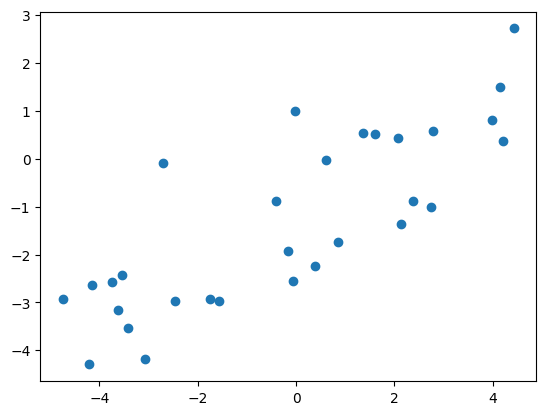

In [4]:
# Plot mock data
plt.scatter(X, Y)

In [6]:
# Prepare data to the correct format
# 1. Data should be dimension (N, 1)
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

# 2. Data should in be Tensor with type float32
# Numpy has defalut type with float64 so we need to fix it.
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [9]:
# Prepare model
model = nn.Linear(1, 1)

In [10]:
# Prepare criterion and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [12]:
# Train data
n_epochs = 30
losses = []

for iteration in range(n_epochs):
  # Delete accumulate gradient descent
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item()) # Correct loss for plot it later.

  # Backward pass
  loss.backward()
  optimizer.step()

  print(f'Iteration {iteration}/{n_epochs}, Loss: {loss}')

Iteration 0/30, Loss: 14.256200790405273
Iteration 1/30, Loss: 6.659214496612549
Iteration 2/30, Loss: 3.5563666820526123
Iteration 3/30, Loss: 2.2483861446380615
Iteration 4/30, Loss: 1.6723767518997192
Iteration 5/30, Loss: 1.4042505025863647
Iteration 6/30, Loss: 1.271316409111023
Iteration 7/30, Loss: 1.2010910511016846
Iteration 8/30, Loss: 1.1618380546569824
Iteration 9/30, Loss: 1.1388884782791138
Iteration 10/30, Loss: 1.1250240802764893
Iteration 11/30, Loss: 1.1164591312408447
Iteration 12/30, Loss: 1.1110907793045044
Iteration 13/30, Loss: 1.1076948642730713
Iteration 14/30, Loss: 1.1055344343185425
Iteration 15/30, Loss: 1.1041553020477295
Iteration 16/30, Loss: 1.1032731533050537
Iteration 17/30, Loss: 1.1027079820632935
Iteration 18/30, Loss: 1.1023457050323486
Iteration 19/30, Loss: 1.1021133661270142
Iteration 20/30, Loss: 1.1019643545150757
Iteration 21/30, Loss: 1.1018685102462769
Iteration 22/30, Loss: 1.1018073558807373
Iteration 23/30, Loss: 1.1017680168151855
Iter

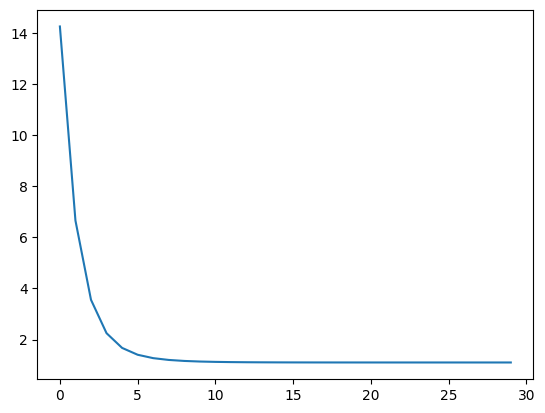

In [13]:
# Plot losses
plt.plot(losses)

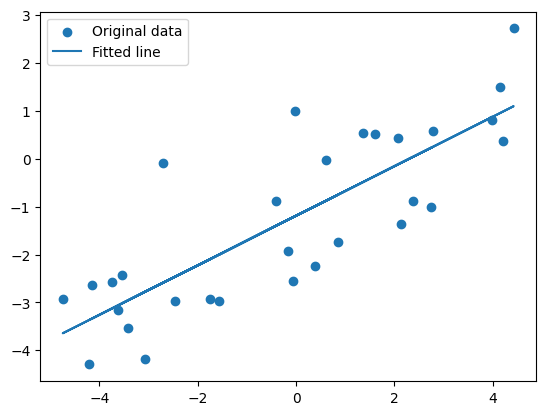

In [14]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [16]:
# Get model parameters
w = model.weight.data.numpy() # Weight will be tuple beacause we can have more than one
b = model.bias.data.numpy()
print(w, b)

[[0.51684237]] [-1.1905307]
